<a href="https://colab.research.google.com/github/KadrEfe/Class5-Data_Visualization-Module-Week24/blob/main/Data_Visualization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings            
warnings.filterwarnings("ignore")



In [246]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [247]:
path='/content/drive/MyDrive/Colab Notebooks/df_visual.pickle'
df = pd.read_pickle(path)

In [248]:
path='/content/drive/MyDrive/Colab Notebooks/withoutNAN.pickle'
df_2 = pd.read_pickle(path)

In [249]:
df.head(3)



,province,make,make_model,price,body_type,registration,vehicle_age,mileage,Gearbox,gears,...,Rear airbag,Side airbag,Speed limit control system,Tire pressure monitoring system,Traffic sign recognition,Xenon headlights,Adaptive Cruise Cntrl,Central door lock with remote contrl,Electronic stability contrl,Traction contrl
0,North Brabant,Audi,Audi_A3,4450,Compact,2003.0,19.0,191066.0,Automatic,7,...,0,1,0,0,0,0,0,1,1,1
1,Limburg,Audi,Audi_A3,12950,Compact,2013.0,9.0,94758.0,Automatic,7,...,0,0,0,0,0,0,0,1,0,0
2,North Brabant,Audi,Audi_A3,12445,Compact,2013.0,9.0,160883.0,Automatic,7,...,0,1,0,0,0,0,0,1,1,1


Text(0, 0.5, 'Car Model')

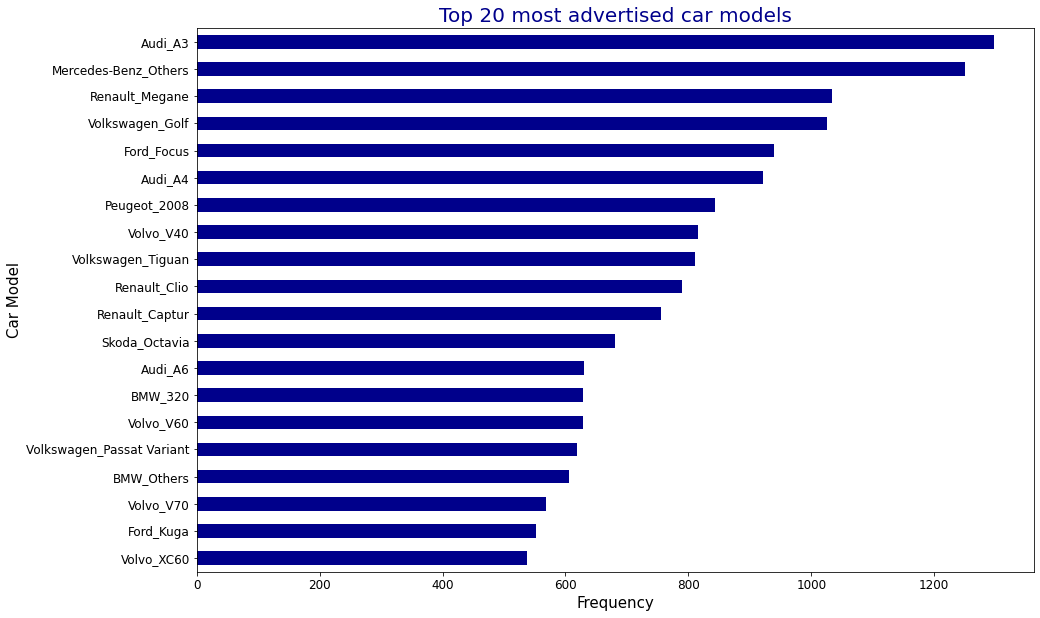

In [250]:
# 1-Top 20 most advertised car models
df['make_model'].value_counts().head(20).sort_values().plot.barh(figsize=(15,10),color="darkblue",fontsize=12)
plt.title("Top 20 most advertised car models",fontsize=20,color="darkblue")
plt.xlabel("Frequency" ,fontsize=15)
plt.ylabel("Car Model",rotation=90,fontsize=15)

Text(0, 0.5, 'Gears')

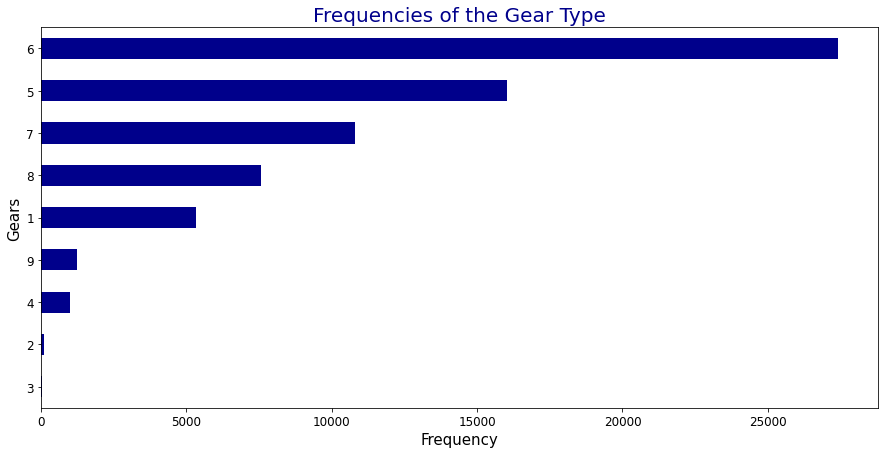

In [251]:
#2-Frequencies of the number of vehicle advertisements placed in the advertisement according to the gear type
df['gears'].value_counts().sort_values().plot.barh( figsize=(15,7),color="darkblue",fontsize=12)
plt.title("Frequencies of the Gear Type",fontsize=20,color="darkblue")
plt.xlabel("Frequency" ,fontsize=15)
plt.ylabel("Gears",rotation=90,fontsize=15)

Text(0, 0.5, 'fuel_type')

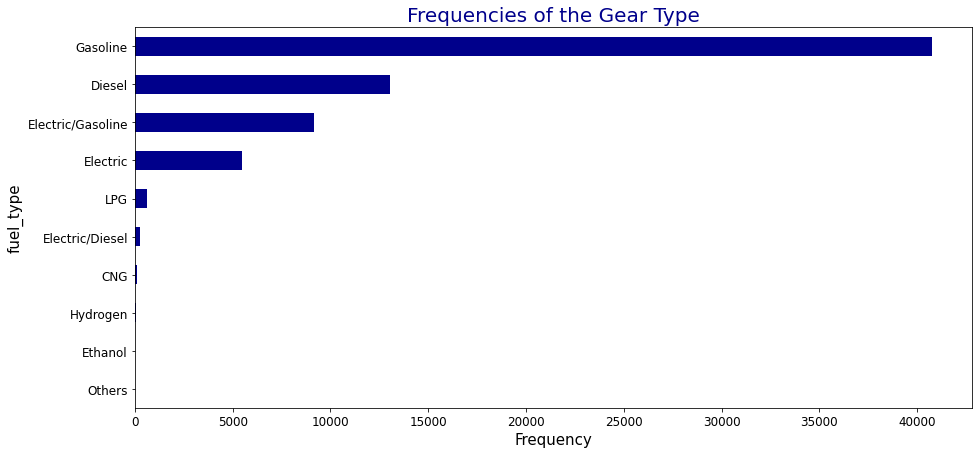

In [252]:
#3-Frequencies of the number of vehicle advertisements placed in the advertisement according to the fuel type
df['fuel_type'].value_counts().sort_values().plot.barh( figsize=(15,7),color="darkblue",fontsize=12)
plt.title("Frequencies of the Gear Type",fontsize=20,color="darkblue")
plt.xlabel("Frequency" ,fontsize=15)
plt.ylabel("fuel_type",rotation=90,fontsize=15)

Text(0, 0.5, 'Brand')

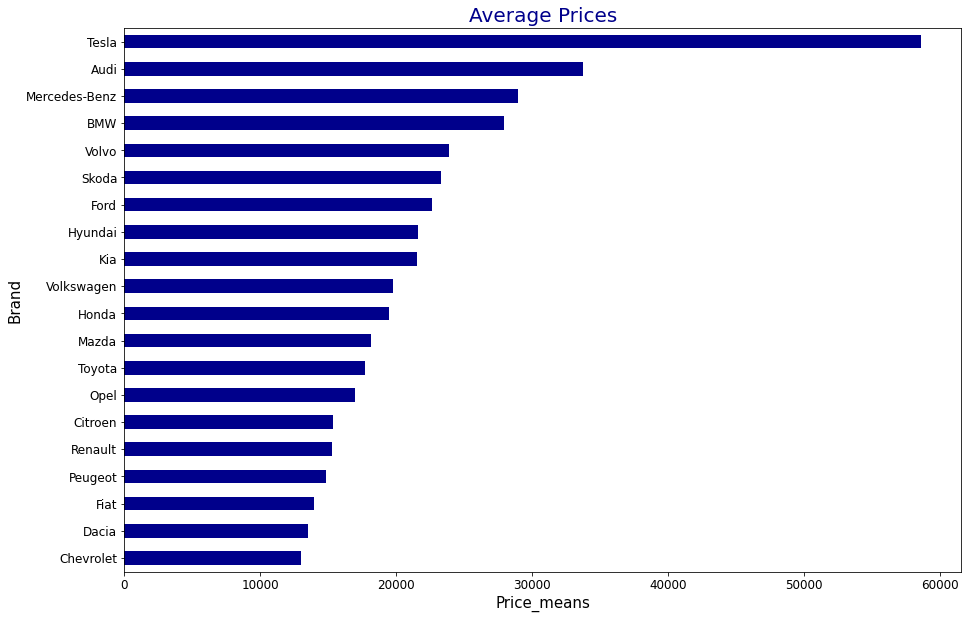

In [253]:
#4-Graph of average prices by brand.
df.groupby('make')['price'].mean().sort_values().plot.barh( figsize=(15,10),color="darkblue",fontsize=12)
plt.title("Average Prices",fontsize=20,color="darkblue")
plt.xlabel("Price_means" ,fontsize=15)
plt.ylabel("Brand",rotation=90,fontsize=15)

Text(0, 0.5, 'Fuel_type')

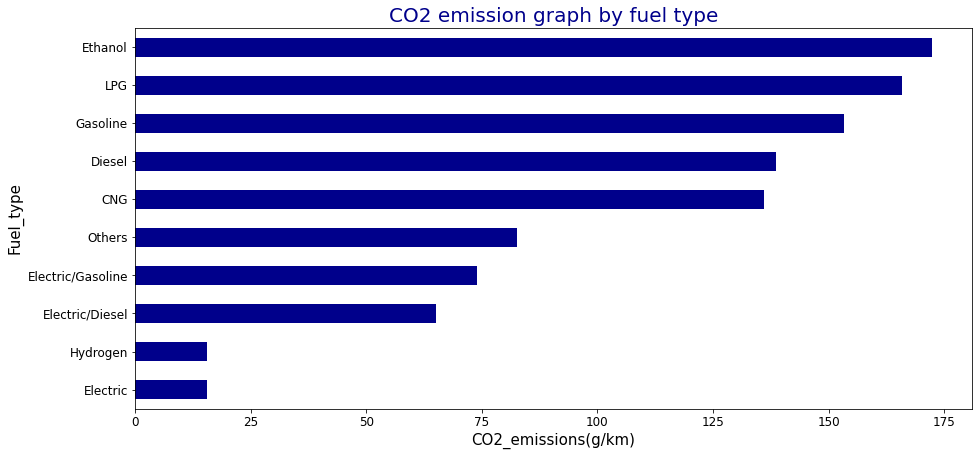

In [254]:
#6-CO2 emission graph by fuel type
df.groupby('fuel_type')['co2_emissions'].mean().sort_values().plot.barh( figsize=(15,7),color="darkblue",fontsize=12)
plt.title("CO2 emission graph by fuel type",fontsize=20,color="darkblue")
plt.xlabel("CO2_emissions(g/km)" ,fontsize=15)
plt.ylabel("Fuel_type",rotation=90,fontsize=15)

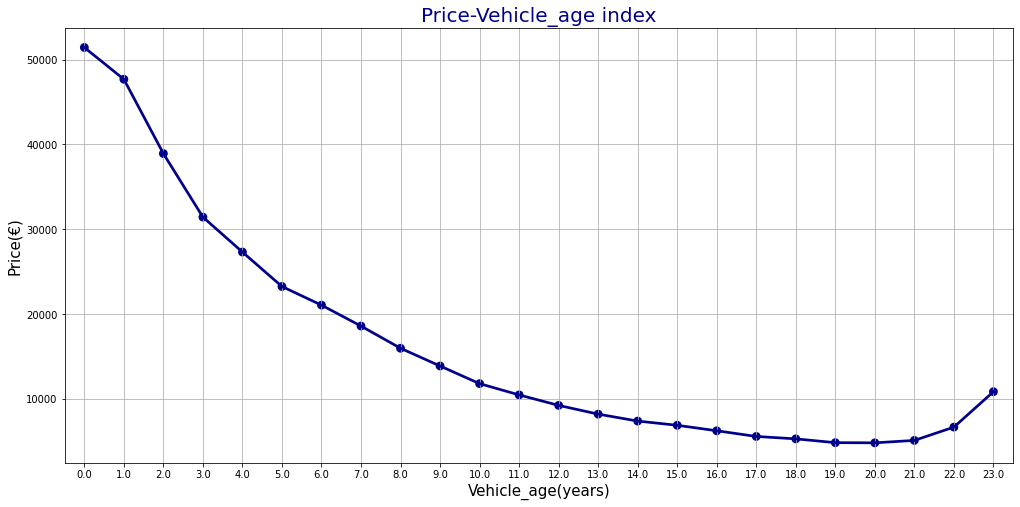

In [255]:
#7-age+price index
f,ax1 = plt.subplots(figsize =(17,8))
sns.pointplot(x=df.groupby('vehicle_age')['price'].mean().index,y=df.groupby('vehicle_age')['price'].mean().values,data=df,color='darkblue',alpha=0.8)
plt.xlabel('Vehicle_age(years)',fontsize = 15,color='black')
plt.ylabel('Price(€)',fontsize = 15,color='black')
plt.title("Price-Vehicle_age index",fontsize = 20,color='darkblue')
plt.grid()


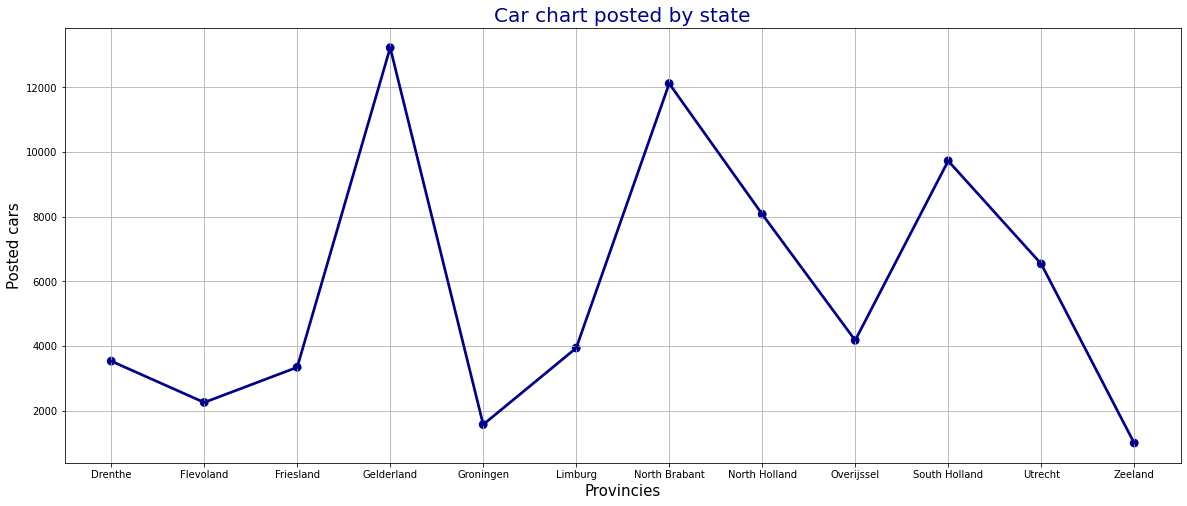

In [256]:
#8-car chart posted by state
f,ax1 = plt.subplots(figsize =(20,8))
sns.pointplot(x=df.groupby('province')['make'].count().index,y=df.groupby('province')['make'].count().values,data=df,color='darkblue',alpha=0.8)
plt.xlabel('Provincies',fontsize = 15,color='black')
plt.ylabel('Posted cars',fontsize = 15,color='black')
plt.title("Car chart posted by state",fontsize = 20,color='darkblue')
plt.grid()

In [257]:
df.groupby('province')['make'].count().sort_values()

province
Zeeland           1004
Groningen         1575
Flevoland         2258
Friesland         3345
Drenthe           3536
Limburg           3940
Overijssel        4178
Utrecht           6540
North Holland     8076
South Holland     9724
North Brabant    12113
Gelderland       13222
Name: make, dtype: int64

Text(0, 0.5, 'Brand')

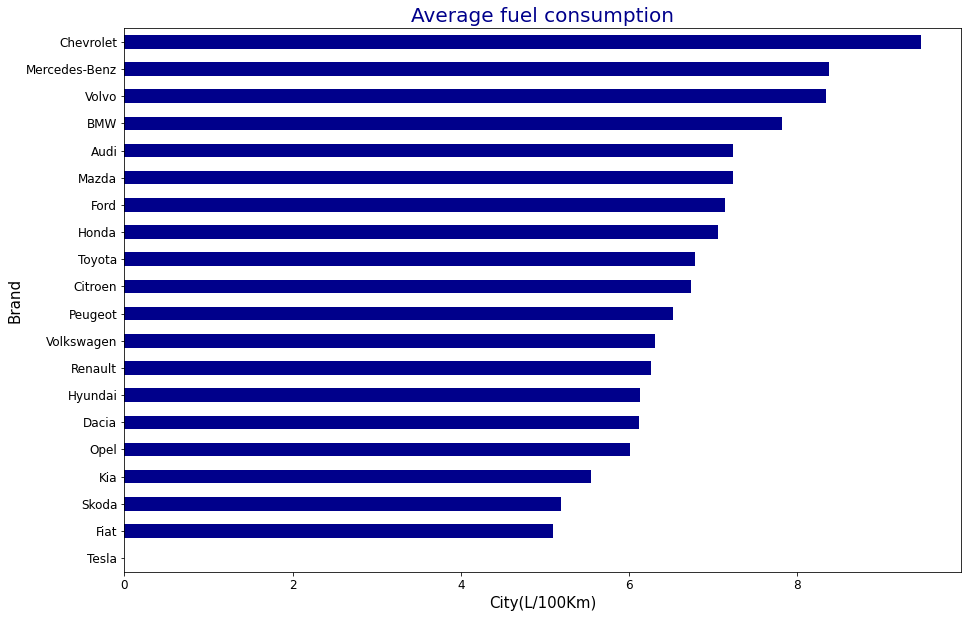

In [258]:
#9-average fuel consumption by brands
df.groupby('make')['city(L/100Km)'].mean().sort_values().plot.barh( figsize=(15,10),color="darkblue",fontsize=12)
plt.title("Average fuel consumption",fontsize=20,color="darkblue")
plt.xlabel("City(L/100Km)" ,fontsize=15)
plt.ylabel("Brand",rotation=90,fontsize=15)

Text(0, 0.5, 'Brand')

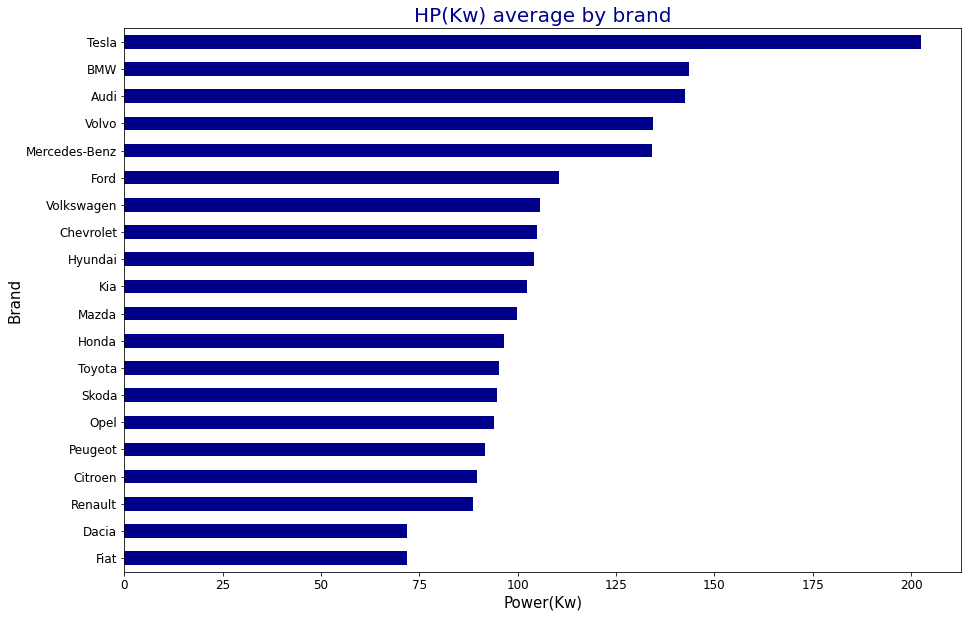

In [259]:
#10-HP(Kw) average by brand
df.groupby('make')['power(kW)'].mean().sort_values().plot.barh( figsize=(15,10),color="darkblue",fontsize=12)
plt.title("HP(Kw) average by brand",fontsize=20,color="darkblue")
plt.xlabel("Power(Kw)" ,fontsize=15)
plt.ylabel("Brand",rotation=90,fontsize=15)

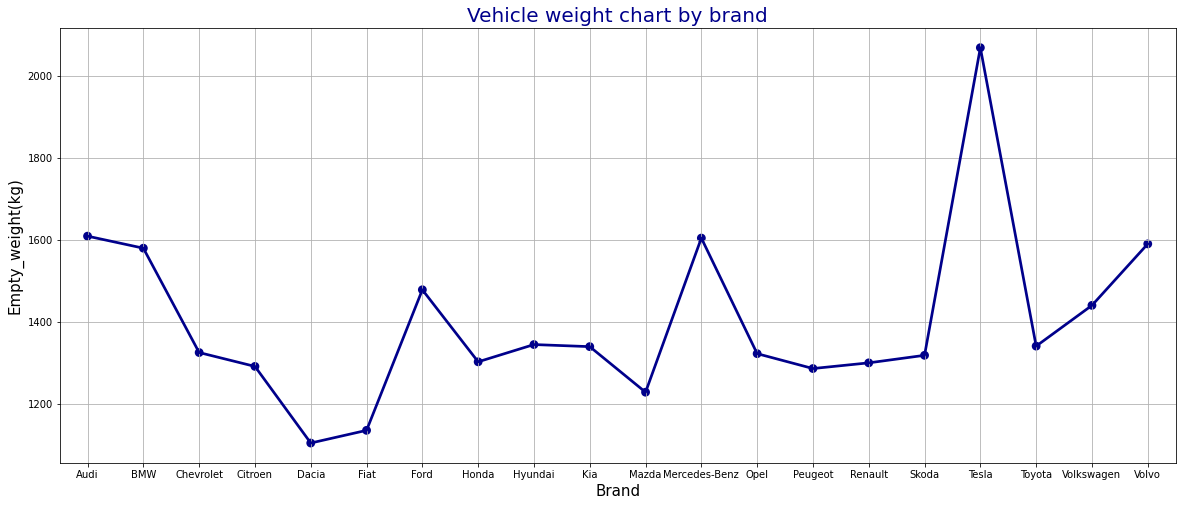

In [260]:
#11-vehicle weight chart by brand
f,ax1 = plt.subplots(figsize =(20,8))
sns.pointplot(x=df_2.groupby('make')['empty_weight'].mean().index,y=df_2.groupby('make')['empty_weight'].mean().values,data=df_2,color='darkblue',alpha=0.8)
plt.xlabel('Brand',fontsize = 15,color='black')
plt.ylabel('Empty_weight(kg)',fontsize = 15,color='black')
plt.title("Vehicle weight chart by brand",fontsize = 20,color='darkblue')
plt.grid()